In [2]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path='/content/drive/MyDrive/leaf_disease_data.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

data=pd.read_csv(dataset_path)

print('Representation of data',data.head())
print('Data Information',data.info())
print('Data Description',data.describe())


Representation of data           Red       Green        Blue  Label
0  124.048462  159.922668  134.653625      0
1  121.146729  151.885803  111.660583      0
2   58.230225  152.199829  121.557922      0
3   66.433289  152.290527  115.645691      0
4  140.696655  164.491272  156.207825      0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Red     213 non-null    float64
 1   Green   213 non-null    float64
 2   Blue    213 non-null    float64
 3   Label   213 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.8 KB
Data Information None
Data Description               Red       Green        Blue       Label
count  213.000000  213.000000  213.000000  213.000000
mean    92.438766  144.822240  126.072125    0.408451
std     25.909182   23.765844   20.938927    0.492705
min     28.902039   87.171997   89.098145    0.000000
25%     71.133057  135

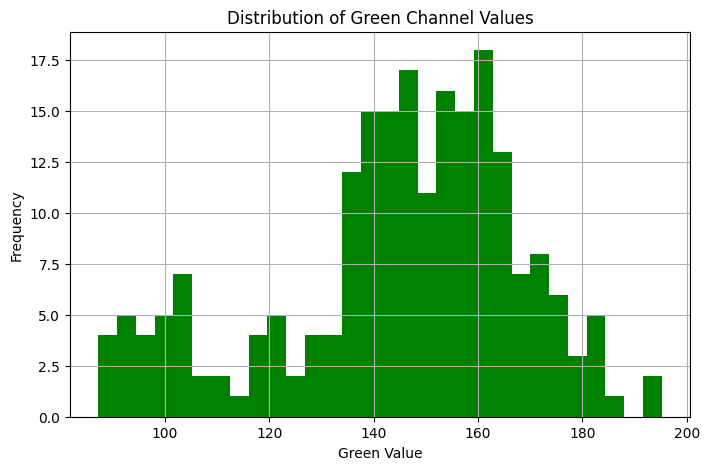

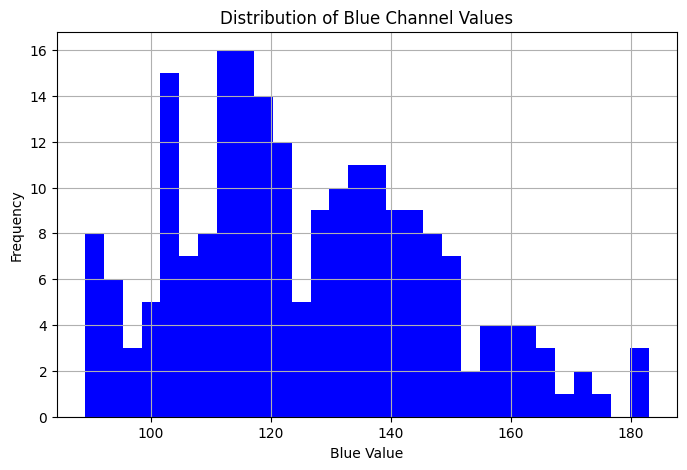

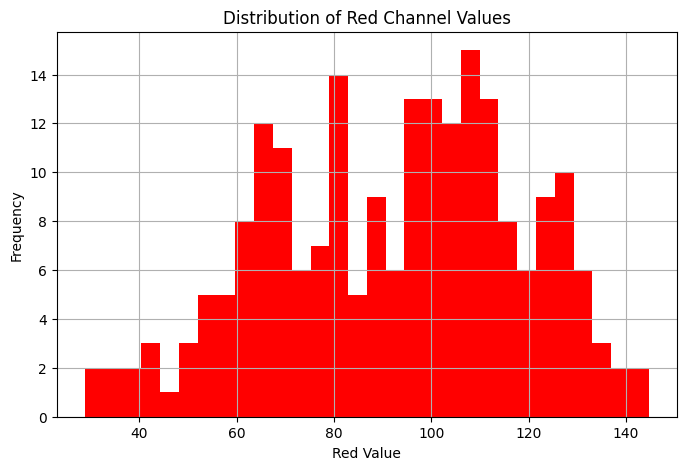

In [40]:

data['Green'].hist(bins=30, figsize=(8, 5), color='green')
plt.title('Distribution of Green Channel Values')
plt.xlabel('Green Value')
plt.ylabel('Frequency')
plt.show()

print('\n')


data['Blue'].hist(bins=30, figsize=(8, 5), color='blue')
plt.title('Distribution of Blue Channel Values')
plt.xlabel('Blue Value')
plt.ylabel('Frequency')
plt.show()

print('\n')

data['Red'].hist(bins=30, figsize=(8, 5), color='red')
plt.title('Distribution of Red Channel Values')
plt.xlabel('Red Value')
plt.ylabel('Frequency')
plt.show()


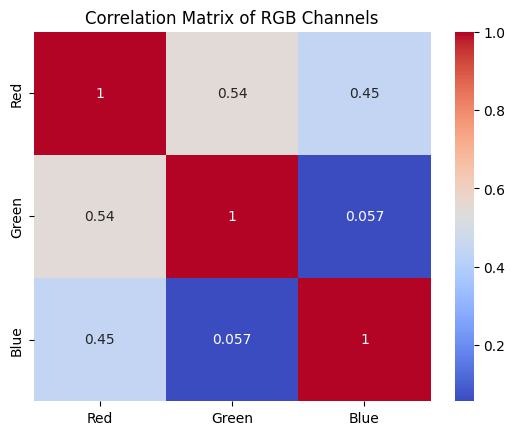

In [13]:
sns.heatmap(data[['Red', 'Green', 'Blue']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of RGB Channels")
plt.show()

In [20]:

mean_values = data[['Red', 'Green', 'Blue']].mean()
median_values = data[['Red', 'Green', 'Blue']].median()
std_values = data[['Red', 'Green', 'Blue']].std()
variance_values=data[['Red','Green','Blue']].var()


print("Mean values:\n", mean_values)
print("\nMedian values:\n", median_values)
print("\nStandard Deviation values:\n", std_values)
print("\nVariance Values\n",variance_values)


Mean values:
 Red       92.438766
Green    144.822240
Blue     126.072125
dtype: float64

Median values:
 Red       95.503052
Green    147.943726
Blue     121.990845
dtype: float64

Standard Deviation values:
 Red      25.909182
Green    23.765844
Blue     20.938927
dtype: float64

Variance Values
 Red      671.285704
Green    564.815360
Blue     438.438646
dtype: float64


Outliers in Red Channel:
 Empty DataFrame
Columns: [Red, Green, Blue, Label, Category]
Index: []
Outliers in Green Channel:
             Red      Green        Blue  Label Category
139   98.134216  94.097900  143.996155      1     Blue
145   48.083862  87.171997  106.953186      1      Red
153   41.083435  89.267090  110.377625      1     Blue
156   92.800232  90.175537  146.930054      1      Red
165   88.353577  88.393677  128.902649      1      Red
167   34.730835  96.266663  125.144165      1     Blue
169   94.742798  92.804749  136.759094      1      Red
172   40.245483  96.309509  124.389160      1      Red
176  108.371887  94.216919  150.403870      1     Blue
189   40.811157  91.574158  117.100769      1     Blue
211   39.247864  93.072754  123.207092      1      Red
Outliers in Blue Channel:
 Empty DataFrame
Columns: [Red, Green, Blue, Label, Category]
Index: []


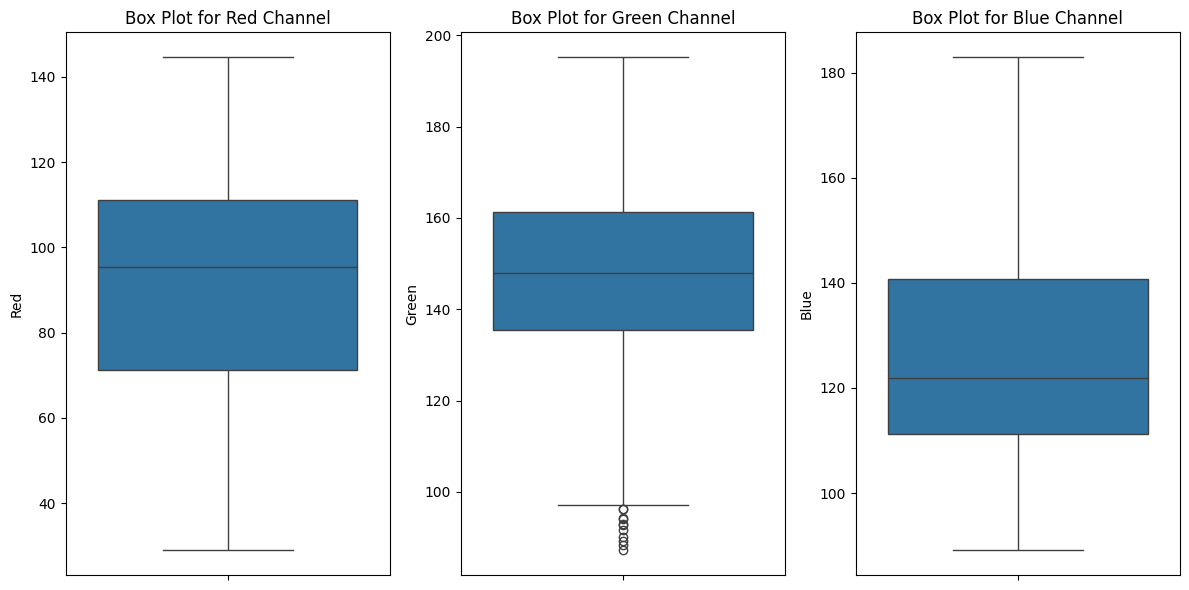

In [41]:

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    return outliers

outliers_red = detect_outliers(data, 'Red')
outliers_green = detect_outliers(data, 'Green')
outliers_blue = detect_outliers(data, 'Blue')

print("Outliers in Red Channel:\n", outliers_red)
print("Outliers in Green Channel:\n", outliers_green)
print("Outliers in Blue Channel:\n", outliers_blue)

plt.figure(figsize=(12, 6))


plt.subplot(1, 3, 1)
sns.boxplot(data['Red'])
plt.title('Box Plot for Red Channel')


plt.subplot(1, 3, 2)
sns.boxplot(data['Green'])
plt.title('Box Plot for Green Channel')

# Boxplot for Blue Channel
plt.subplot(1, 3, 3)
sns.boxplot(data['Blue'])
plt.title('Box Plot for Blue Channel')

# Display the plots
plt.tight_layout()
plt.show()


In [42]:
from scipy.stats import ttest_ind

t_stat_rg, p_val_rg = ttest_ind(data['Red'], data['Green'])
print(f"T-Test between Red and Green channels: T-Statistic = {t_stat_rg}, p-value = {p_val_rg}")

t_stat_rb, p_val_rb = ttest_ind(data['Red'], data['Blue'])
print(f"T-Test between Red and Blue channels: T-Statistic = {t_stat_rb}, p-value = {p_val_rb}")

t_stat_gb, p_val_gb = ttest_ind(data['Green'], data['Blue'])
print(f"T-Test between Green and Blue channels: T-Statistic = {t_stat_gb}, p-value = {p_val_gb}")



T-Test between Red and Green channels: T-Statistic = -21.74488472128209, p-value = 5.650394620699429e-71
T-Test between Red and Blue channels: T-Statistic = -14.735079845465464, p-value = 5.63903660154783e-40
T-Test between Green and Blue channels: T-Statistic = 8.639493404728395, p-value = 1.1623402854846532e-16


In [19]:
from statsmodels.stats.weightstats import ztest

z_stat_rg, p_val_rg = ztest(data['Red'], data['Green'])
print(f"Z-Test between Red and Green channels: Z-Statistic = {z_stat_rg}, p-value = {p_val_rg}")

z_stat_rb, p_val_rb = ztest(data['Red'], data['Blue'])
print(f"Z-Test between Red and Blue channels: Z-Statistic = {z_stat_rb}, p-value = {p_val_rb}")

z_stat_gb, p_val_gb = ztest(data['Green'], data['Blue'])
print(f"Z-Test between Green and Blue channels: Z-Statistic = {z_stat_gb}, p-value = {p_val_gb}")


Z-Test between Red and Green channels: Z-Statistic = -21.74488472128209, p-value = 7.722632341364431e-105
Z-Test between Red and Blue channels: Z-Statistic = -14.735079845465464, p-value = 3.8374355343502925e-49
Z-Test between Green and Blue channels: Z-Statistic = 8.639493404728395, p-value = 5.646282409958967e-18


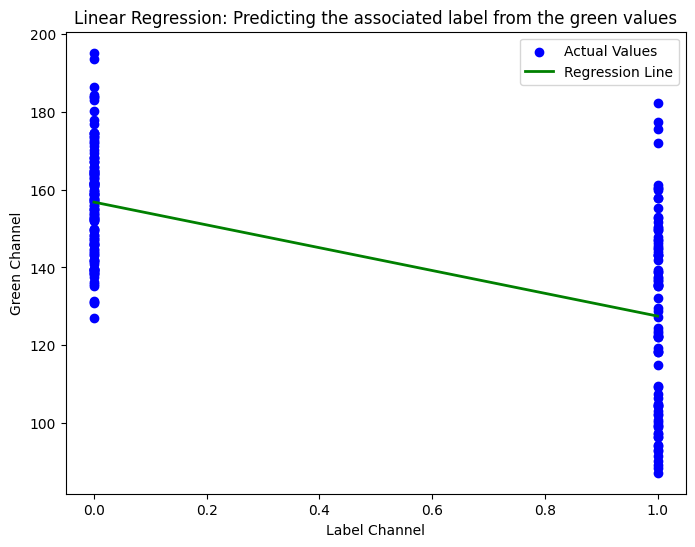

In [25]:

from sklearn.linear_model import LinearRegression
import numpy as np

X = data[['Label']].values
y = data['Green'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Values')
plt.plot(X, y_pred, color='green', linewidth=2, label='Regression Line')
plt.xlabel('Label Channel')
plt.ylabel('Green Channel')
plt.title('Linear Regression: Predicting the associated label from the green values')
plt.legend()
plt.show()



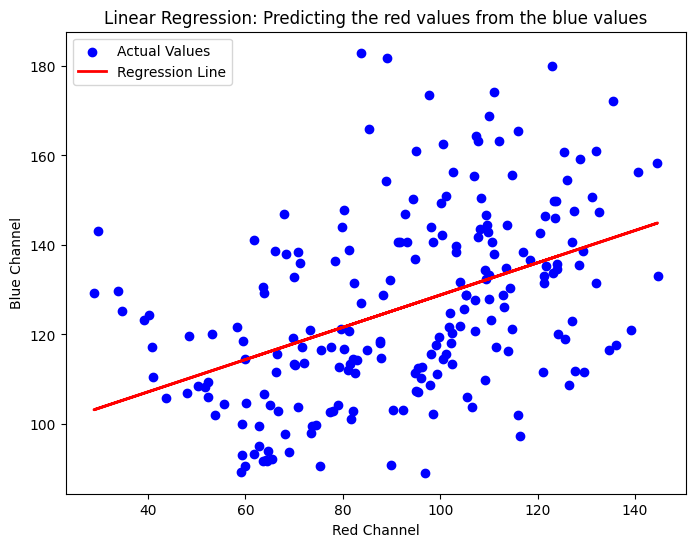

In [26]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = data[['Red']].values
y = data['Blue'].values

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual Values')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Red Channel')
plt.ylabel('Blue Channel')
plt.title('Linear Regression: Predicting the red values from the blue values')
plt.legend()
plt.show()

Mean Squared Error (Multiple Linear Regression): 333.0324713278749
R-squared (Multiple Linear Regression): 0.21063036553927295




<ipython-input-29-b089c284de9a>:22: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, color='red')


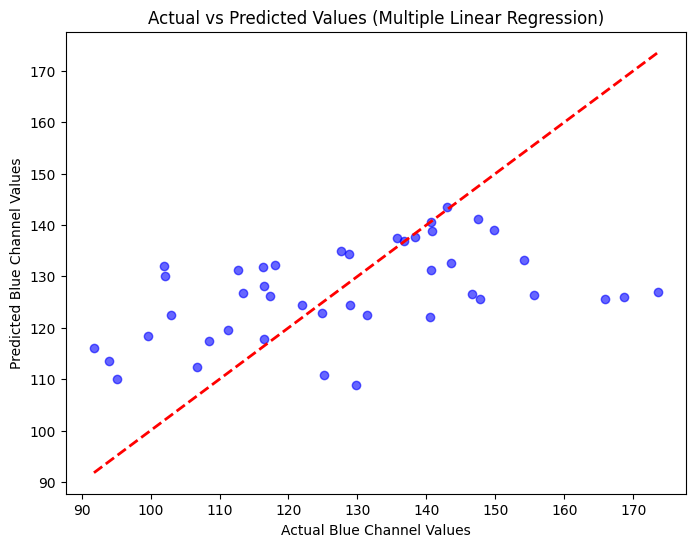

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X_multi = data[['Red', 'Green']]
y_multi = data['Blue']

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train, y_train)

y_pred_multi = model_multi.predict(X_test)

print("Mean Squared Error (Multiple Linear Regression):", mean_squared_error(y_test, y_pred_multi))
print("R-squared (Multiple Linear Regression):", r2_score(y_test, y_pred_multi))

print('\n')

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_multi, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2, color='red')
plt.xlabel('Actual Blue Channel Values')
plt.ylabel('Predicted Blue Channel Values')
plt.title('Actual vs Predicted Values (Multiple Linear Regression)')
plt.show()


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X_log = data[['Red', 'Green', 'Blue']]
y_log = data['Label']

X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

model_log = LogisticRegression()
model_log.fit(X_train_log, y_train_log)

y_pred_log = model_log.predict(X_test_log)

print("Accuracy (Logistic Regression):", accuracy_score(y_test_log, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_log, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test_log, y_pred_log))


Accuracy (Logistic Regression): 1.0

Confusion Matrix:
 [[22  0]
 [ 0 21]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        21

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



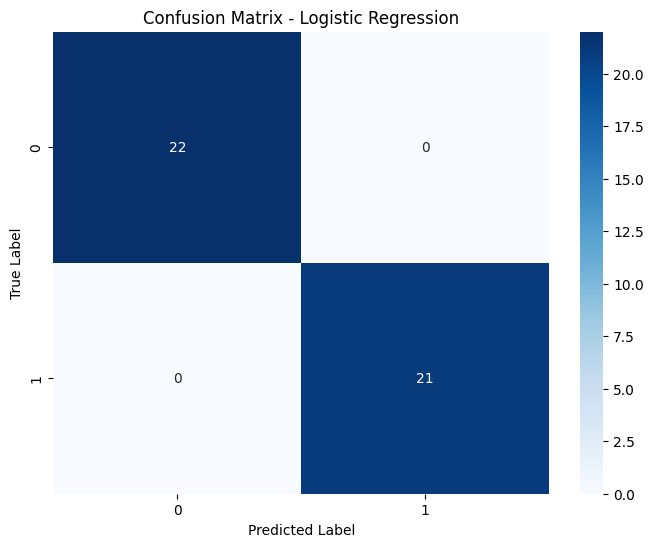

In [45]:
conf_matrix = confusion_matrix(y_test_log, y_pred_log)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model_log.classes_, yticklabels=model_log.classes_)
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


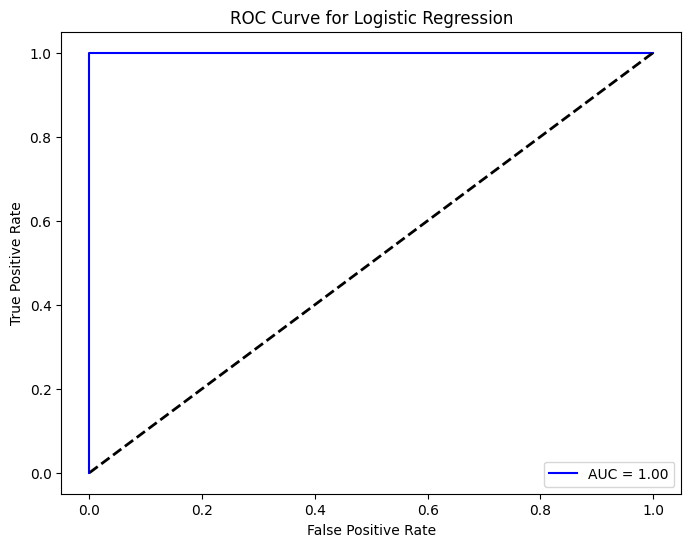

In [46]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob_log = model_log.predict_proba(X_test_log)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_log, y_prob_log)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc_score(y_test_log, y_prob_log):.2f}')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.show()


In [37]:
from scipy.stats import f_oneway

# Perform one-way ANOVA
f_stat, p_value = f_oneway(data['Red'], data['Green'], data['Blue'])

print("One-Way ANOVA Results:")
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Example of adding a 'Category' column for demonstration
data['Category'] = np.random.choice(['Red', 'Blue'], size=len(data))  # Comment if you already have a second factor

# Define the model for two-way ANOVA
model = ols('Blue ~ C(Label) + C(Category) + C(Label):C(Category)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print('\n')
print("Two-Way ANOVA Results:")
print(anova_table)



One-Way ANOVA Results:
F-Statistic: 268.822523552726
P-Value: 2.4359580627314903e-85


Two-Way ANOVA Results:
                            sum_sq     df           F        PR(>F)
C(Label)              30009.202545    1.0  100.154903  1.636007e-19
C(Category)             160.638348    1.0    0.536126  4.648629e-01
C(Label):C(Category)    317.524049    1.0    1.059728  3.044671e-01
Residual              62622.229860  209.0         NaN           NaN
